## 高阶API创建模型

TensorFlow的高阶API主要为tf.keras.models提供的模型的类接口。

使用Keras接口有以下3种方式构建模型：
- 使用Sequential按层顺序构建模型，
- 使用函数式API构建任意结构模型，继承Model基类构建自定义模型。



In [ ]:
import tensorflow as tf

#打印时间分割线
@tf.function
def printbar():
    today_ts = tf.timestamp()%(24*60*60)

    hour = tf.cast(today_ts//3600+8,tf.int32)%tf.constant(24)
    minite = tf.cast((today_ts%3600)//60,tf.int32)
    second = tf.cast(tf.floor(today_ts%60),tf.int32)
    
    def timeformat(m):
        if tf.strings.length(tf.strings.format("{}",m))==1:
            return(tf.strings.format("0{}",m))
        else:
            return(tf.strings.format("{}",m))
    
    timestring = tf.strings.join([timeformat(hour),timeformat(minite),
                timeformat(second)],separator = ":")
    tf.print("=========="*8+timestring)

用Sequential按层顺序构建模型，并使用内置model.fit方法训练模型。

### 数据准备

In [5]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
import tensorflow as tf
from tensorflow.keras import layers,losses,metrics,optimizers
from tensorflow.keras import models  # 使用models类

print(tf.__version__)

2.1.0


In [2]:
# 生成样本数据

n = 400

# 生成测试用数据集
X = tf.random.uniform([n,2],minval=-10,maxval=10) 
w0 = tf.constant([[2.0],[-3.0]])
b0 = tf.constant([[3.0]])
Y = X@w0 + b0 + tf.random.normal([n,1],mean = 0.0,stddev= 2.0)  # @表示矩阵乘法,增加正态扰动

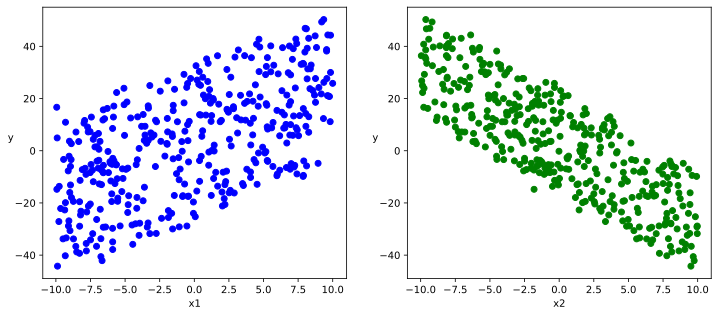

In [3]:
# 数据可视化
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize = (12,5))
ax1 = plt.subplot(121)
ax1.scatter(X[:,0],Y[:,0], c = "b")
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)

ax2 = plt.subplot(122)
ax2.scatter(X[:,1],Y[:,0], c = "g")
plt.xlabel("x2")
plt.ylabel("y",rotation = 0)
plt.show()

In [6]:
# 创建模型

# ？？？？？
tf.keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(1,input_shape=(2,)))
# 打印模型
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 训练模型

# 编译模型：定义优化器，损失函数，评价函数
model.compile(optimizer="adam",loss="mse",metrics=["mae"])
# 训练函数
model.fit(X,Y,batch_size=10,epochs=200)

tf.print("w = ",model.layers[0].kernel)
tf.print("b = ",model.layers[0].bias)



======] - 0s 245us/sample - loss: 3.2480 - mae: 1.4313
Epoch 5/200
400/400 [==============================] - 0s 256us/sample - loss: 3.2490 - mae: 1.4322
Epoch 6/200
400/400 [==============================] - 0s 281us/sample - loss: 3.2479 - mae: 1.4299
Epoch 7/200
400/400 [==============================] - 0s 298us/sample - loss: 3.2481 - mae: 1.4299
Epoch 8/200
400/400 [==============================] - 0s 268us/sample - loss: 3.2481 - mae: 1.4302
Epoch 9/200
400/400 [==============================] - 0s 240us/sample - loss: 3.2473 - mae: 1.4313
Epoch 10/200
400/400 [==============================] - 0s 253us/sample - loss: 3.2462 - mae: 1.4305
Epoch 11/200
400/400 [==============================] - 0s 255us/sample - loss: 3.2471 - mae: 1.4310
Epoch 12/200
400/400 [==============================] - 0s 247us/sample - loss: 3.2489 - mae: 1.4312
Epoch 13/200
400/400 [==============================] - 0s 228us/sample - loss: 3.2481 - mae: 1.4314
Epoch 14/200
400/400 [===================

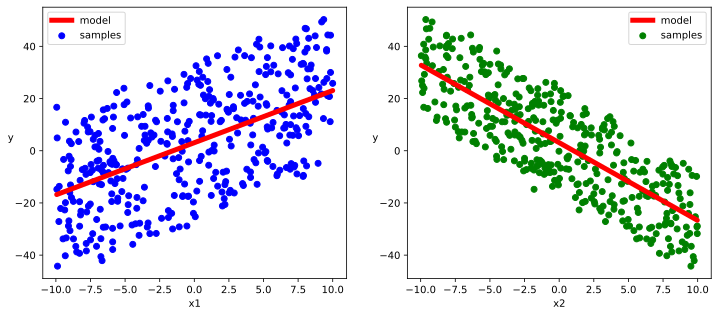

In [10]:

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

w,b = model.variables

plt.figure(figsize = (12,5))
ax1 = plt.subplot(121)
ax1.scatter(X[:,0],Y[:,0], c = "b",label = "samples")
ax1.plot(X[:,0],w[0]*X[:,0]+b[0],"-r",linewidth = 5.0,label = "model")
ax1.legend()
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)

ax2 = plt.subplot(122)
ax2.scatter(X[:,1],Y[:,0], c = "g",label = "samples")
ax2.plot(X[:,1],w[1]*X[:,1]+b[0],"-r",linewidth = 5.0,label = "model")
ax2.legend()
plt.xlabel("x2")
plt.ylabel("y",rotation = 0)

plt.show()